In [1]:
from fastai.vision.all import *

In [3]:
torch.cuda.is_available()

True

In [4]:
path = untar_data(URLs.IMAGENETTE)

In [5]:
#hide
Path.BASE_PATH = path

In [6]:
path.ls()

(#2) [Path('val'),Path('train')]

In [29]:
tfms = [[PILImage.create], [parent_label, Categorize()]]

In [36]:
item_tfms = [ToTensor(), Resize(128)]

In [19]:
batch_tfms = [FlipItem(), RandomResizedCrop(128, min_scale=0.35), IntToFloatTensor(),
              Normalize.from_stats(*imagenet_stats)]

In [24]:
items = get_image_files(path)

In [26]:
split_idx = GrandparentSplitter(valid_name='val')(items)

In [37]:
dset = Datasets(items, tfms, splits = split_idx)

In [40]:
dset[5]

(PILImage mode=RGB size=381x500, TensorCategory(4))

In [45]:
dls = dset.dataloaders(after_item = item_tfms, after_batch = batch_tfms, bs=64)

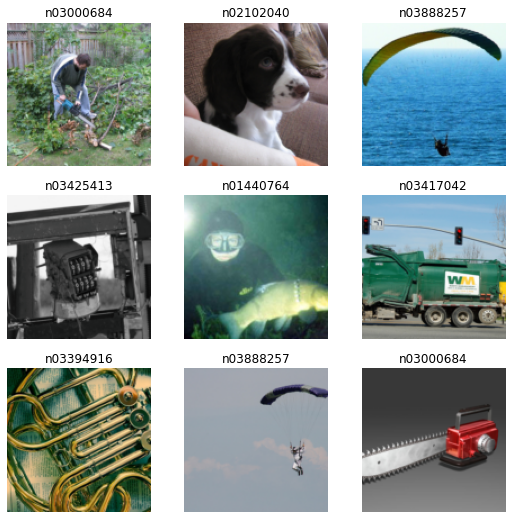

In [48]:
dls.show_batch()

In [51]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

In [52]:
# def label_func(fname):
#     return lbl_dict[parent_label(fname)]

In [56]:
tfms = [[PILImage.create], [parent_label, lbl_dict.__getitem__, Categorize()]]

In [57]:
dset = Datasets(items, tfms, splits = split_idx)

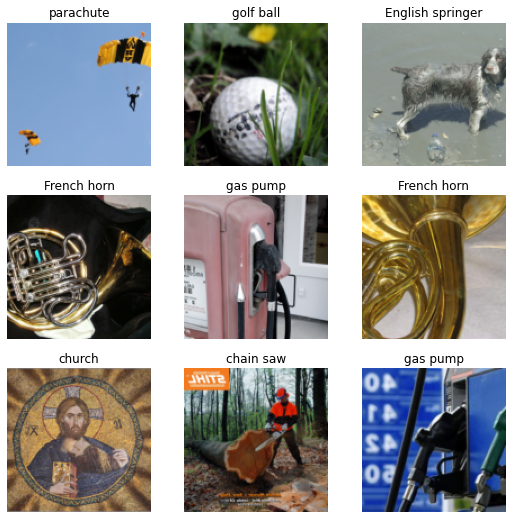

In [59]:
dls = dset.dataloaders(after_item = item_tfms, after_batch = batch_tfms, bs=64)
dls.show_batch()

In [60]:
dls.vocab

(#10) ['English springer','French horn','cassette player','chain saw','church','garbage truck','gas pump','golf ball','parachute','tench']

In [62]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.0012022644514217973)

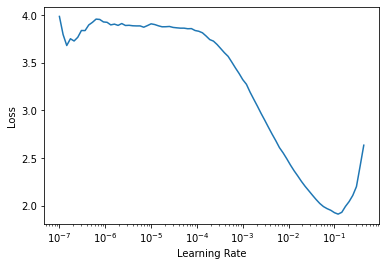

In [63]:
learn.lr_find()

In [64]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.452461,0.189258,0.940637,00:27


epoch,train_loss,valid_loss,accuracy,time
0,0.212997,0.125190,0.962803,00:21
1,0.140869,0.154129,0.955924,00:20
2,0.157172,0.125469,0.959236,00:21
3,0.085858,0.126955,0.962548,00:22
4,0.067605,0.116927,0.964586,00:21
5,0.041396,0.100278,0.968408,00:21
6,0.020853,0.099851,0.967389,00:22
7,0.012734,0.107447,0.966369,00:21


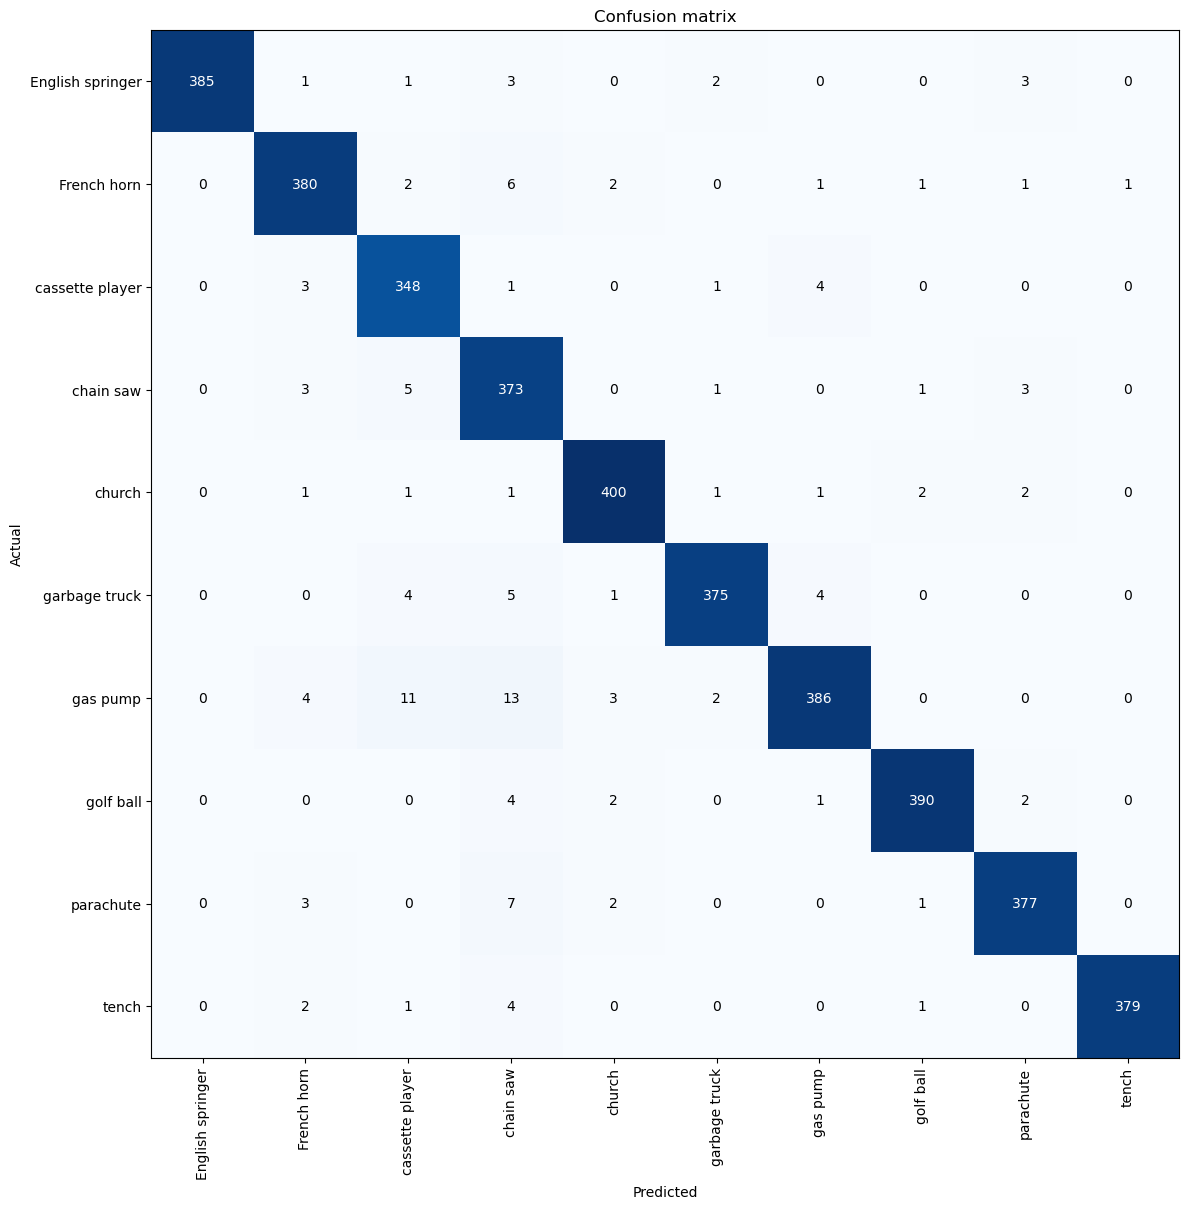

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=100)

In [67]:
interp.most_confused(min_val=5)

[('gas pump', 'chain saw', 13),
 ('gas pump', 'cassette player', 11),
 ('parachute', 'chain saw', 7),
 ('French horn', 'chain saw', 6),
 ('chain saw', 'cassette player', 5),
 ('garbage truck', 'chain saw', 5)]

**Using the Model for Inference**

In [68]:
learn.export()

In [69]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [70]:
learn_inf = load_learner(path/'export.pkl')

In [74]:
learn_inf.predict(path/'English Springer.jpeg')

('English springer',
 tensor(0),
 tensor([1.0000e+00, 2.6991e-09, 4.9596e-10, 8.1750e-12, 1.5038e-09, 9.8067e-12,
         6.1477e-13, 5.6267e-13, 7.8280e-11, 8.0112e-13]))